In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

# Object Creation
Creating a **Series** by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a **DataFrame** by passing a numpy array, with a datetime index and labeled columns:

In [3]:
In [6]: dates = pd.date_range('20130101', periods=6)

dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

df

,A,B,C,D
2013-01-01,-0.719942,1.051852,-0.915979,-0.677642
2013-01-02,-0.366188,0.414925,1.678435,-0.386271
2013-01-03,-1.175001,-1.662827,-2.114315,-0.719904
2013-01-04,-0.622694,1.534232,0.115894,-0.759343
2013-01-05,-0.209689,-0.341447,-0.905504,-0.975897
2013-01-06,0.464641,2.321138,-1.755172,-0.629849


Creating a **DataFrame** by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific **dtypes**

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing Data
See the top & bottom rows of the frame

In [7]:
df.head()

,A,B,C,D
2013-01-01,-0.719942,1.051852,-0.915979,-0.677642
2013-01-02,-0.366188,0.414925,1.678435,-0.386271
2013-01-03,-1.175001,-1.662827,-2.114315,-0.719904
2013-01-04,-0.622694,1.534232,0.115894,-0.759343
2013-01-05,-0.209689,-0.341447,-0.905504,-0.975897


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.622694,1.534232,0.115894,-0.759343
2013-01-05,-0.209689,-0.341447,-0.905504,-0.975897
2013-01-06,0.464641,2.321138,-1.755172,-0.629849


Display the index, columns, and the underlying numpy data

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[-0.71994245,  1.05185175, -0.91597866, -0.67764235],
       [-0.36618834,  0.4149252 ,  1.67843521, -0.38627137],
       [-1.17500085, -1.66282707, -2.11431507, -0.71990416],
       [-0.62269375,  1.53423152,  0.11589396, -0.7593426 ],
       [-0.20968891, -0.34144693, -0.90550386, -0.97589672],
       [ 0.46464146,  2.32113846, -1.75517216, -0.62984904]])

Describe shows a quick statistic summary of your data

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.438145,0.552979,-0.649440,-0.691484
std,0.552959,1.418941,1.379120,0.191545
min,-1.175001,-1.662827,-2.114315,-0.975897
25%,-0.695630,-0.152354,-1.545374,-0.749483
50%,-0.494441,0.733388,-0.910741,-0.698773
75%,-0.248814,1.413637,-0.139455,-0.641797
max,0.464641,2.321138,1.678435,-0.386271


Transposing your data

In [13]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.719942,-0.366188,-1.175001,-0.622694,-0.209689,0.464641
B,1.051852,0.414925,-1.662827,1.534232,-0.341447,2.321138
C,-0.915979,1.678435,-2.114315,0.115894,-0.905504,-1.755172
D,-0.677642,-0.386271,-0.719904,-0.759343,-0.975897,-0.629849


Sorting by an axis

In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.677642,-0.915979,1.051852,-0.719942
2013-01-02,-0.386271,1.678435,0.414925,-0.366188
2013-01-03,-0.719904,-2.114315,-1.662827,-1.175001
2013-01-04,-0.759343,0.115894,1.534232,-0.622694
2013-01-05,-0.975897,-0.905504,-0.341447,-0.209689
2013-01-06,-0.629849,-1.755172,2.321138,0.464641


Sorting by values

In [15]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,-1.175001,-1.662827,-2.114315,-0.719904
2013-01-05,-0.209689,-0.341447,-0.905504,-0.975897
2013-01-02,-0.366188,0.414925,1.678435,-0.386271
2013-01-01,-0.719942,1.051852,-0.915979,-0.677642
2013-01-04,-0.622694,1.534232,0.115894,-0.759343
2013-01-06,0.464641,2.321138,-1.755172,-0.629849


# Selection
## Getting

In [16]:
# Selecting a single column, which yields a Series, equivalent to df.A

df['A']

2013-01-01   -0.719942
2013-01-02   -0.366188
2013-01-03   -1.175001
2013-01-04   -0.622694
2013-01-05   -0.209689
2013-01-06    0.464641
Freq: D, Name: A, dtype: float64

Selecting via [ ], which slices the rows.

In [17]:
df[0:3]

,A,B,C,D
2013-01-01,-0.719942,1.051852,-0.915979,-0.677642
2013-01-02,-0.366188,0.414925,1.678435,-0.386271
2013-01-03,-1.175001,-1.662827,-2.114315,-0.719904


In [18]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.366188,0.414925,1.678435,-0.386271
2013-01-03,-1.175001,-1.662827,-2.114315,-0.719904
2013-01-04,-0.622694,1.534232,0.115894,-0.759343


## Selection by Lable
For getting a cross section using a label

In [19]:
df.loc[dates[0]]

A   -0.719942
B    1.051852
C   -0.915979
D   -0.677642
Name: 2013-01-01 00:00:00, dtype: float64

In [20]:
# Selecting on a multi-axis by label

df.loc[:,['A','B']]

,A,B
2013-01-01,-0.719942,1.051852
2013-01-02,-0.366188,0.414925
2013-01-03,-1.175001,-1.662827
2013-01-04,-0.622694,1.534232
2013-01-05,-0.209689,-0.341447
2013-01-06,0.464641,2.321138


In [21]:
# Showing label slicing, both endpoints are included

df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.366188,0.414925
2013-01-03,-1.175001,-1.662827
2013-01-04,-0.622694,1.534232


In [22]:
# Reduction in the dimensions of the returned object

df.loc['20130102',['A','B']]

A   -0.366188
B    0.414925
Name: 2013-01-02 00:00:00, dtype: float64

In [23]:
# For getting a scalar value

df.loc[dates[0],'A']

-0.71994245477826013

In [24]:
# For getting fast access to a scalar (equiv to the prior method)

df.at[dates[0],'A']

-0.71994245477826013

## Selection by Position

In [25]:
# Select via the position of the passed integers

df.iloc[3]

A   -0.622694
B    1.534232
C    0.115894
D   -0.759343
Name: 2013-01-04 00:00:00, dtype: float64

In [26]:
# By integer slices, acting similar to numpy/python

df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.622694,1.534232
2013-01-05,-0.209689,-0.341447


In [27]:
# By lists of integer position locations, similar to the numpy/python style

df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.366188,1.678435
2013-01-03,-1.175001,-2.114315
2013-01-05,-0.209689,-0.905504


In [28]:
# For slicing rows explicitly

df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.366188,0.414925,1.678435,-0.386271
2013-01-03,-1.175001,-1.662827,-2.114315,-0.719904


In [29]:
# For slicing columns explicitly

df.iloc[:,1:3]

,B,C
2013-01-01,1.051852,-0.915979
2013-01-02,0.414925,1.678435
2013-01-03,-1.662827,-2.114315
2013-01-04,1.534232,0.115894
2013-01-05,-0.341447,-0.905504
2013-01-06,2.321138,-1.755172


In [30]:
# For getting a value explicitly

df.iloc[1,1]

0.41492520485240642

In [31]:
# For getting fast access to a scalar (equiv to the prior method)

df.iat[1,1]

0.41492520485240642

## Boolean Indexing

In [32]:
# Using a single column’s values to select data.

df[df.A > 0]

,A,B,C,D
2013-01-06,0.464641,2.321138,-1.755172,-0.629849


In [33]:
# A where operation for getting.

df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.051852,NaN,NaN
2013-01-02,NaN,0.414925,1.678435,NaN
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,1.534232,0.115894,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,0.464641,2.321138,NaN,NaN


In [34]:
# Using the isin() method for filtering:

df2 = df.copy()

df2['E'] = ['one', 'one','two','three','four','three']

df2

,A,B,C,D,E
2013-01-01,-0.719942,1.051852,-0.915979,-0.677642,one
2013-01-02,-0.366188,0.414925,1.678435,-0.386271,one
2013-01-03,-1.175001,-1.662827,-2.114315,-0.719904,two
2013-01-04,-0.622694,1.534232,0.115894,-0.759343,three
2013-01-05,-0.209689,-0.341447,-0.905504,-0.975897,four
2013-01-06,0.464641,2.321138,-1.755172,-0.629849,three


In [35]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-1.175001,-1.662827,-2.114315,-0.719904,two
2013-01-05,-0.209689,-0.341447,-0.905504,-0.975897,four


## Setting

In [36]:
# Setting a new column automatically aligns the data by the indexes

s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [37]:
df['F']=s1

# Setting values by label

df.at[dates[0],'A'] = 0

# Setting values by position

df.iat[0,1] = 0

# Setting by assigning with a numpy array

df.loc[:,'D'] = np.array([5] * len(df))

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.915979,5,NaN
2013-01-02,-0.366188,0.414925,1.678435,5,1.0
2013-01-03,-1.175001,-1.662827,-2.114315,5,2.0
2013-01-04,-0.622694,1.534232,0.115894,5,3.0
2013-01-05,-0.209689,-0.341447,-0.905504,5,4.0
2013-01-06,0.464641,2.321138,-1.755172,5,5.0


In [38]:
# A where operation with setting.

df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.915979,-5,NaN
2013-01-02,-0.366188,-0.414925,-1.678435,-5,-1.0
2013-01-03,-1.175001,-1.662827,-2.114315,-5,-2.0
2013-01-04,-0.622694,-1.534232,-0.115894,-5,-3.0
2013-01-05,-0.209689,-0.341447,-0.905504,-5,-4.0
2013-01-06,-0.464641,-2.321138,-1.755172,-5,-5.0


# Missing Data
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. 

In [39]:
# Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1],'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.915979,5,NaN,1.0
2013-01-02,-0.366188,0.414925,1.678435,5,1.0,1.0
2013-01-03,-1.175001,-1.662827,-2.114315,5,2.0,NaN
2013-01-04,-0.622694,1.534232,0.115894,5,3.0,NaN


In [40]:
# To drop any rows that have missing data.

df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.366188,0.414925,1.678435,5,1.0,1.0


In [41]:
# Filling missing data

df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.915979,5,5.0,1.0
2013-01-02,-0.366188,0.414925,1.678435,5,1.0,1.0
2013-01-03,-1.175001,-1.662827,-2.114315,5,2.0,5.0
2013-01-04,-0.622694,1.534232,0.115894,5,3.0,5.0


In [42]:
# To get the boolean mask where values are nan

pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations
## Stats
Operations in general *exclude* missing data.

In [43]:
# Performing a descriptive statistic

df.mean()

A   -0.318155
B    0.377670
C   -0.649440
D    5.000000
F    3.000000
dtype: float64

In [44]:
# Same operation on the other axis

df.mean(1)

2013-01-01    1.021005
2013-01-02    1.545434
2013-01-03    0.409571
2013-01-04    1.805486
2013-01-05    1.508672
2013-01-06    2.206122
Freq: D, dtype: float64

In [45]:
# Operating with objects that have different dimensionality and need alignment. 
# In addition, pandas automatically broadcasts along the specified dimension.

s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [46]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.175001,-2.662827,-3.114315,4.0,1.0
2013-01-04,-3.622694,-1.465768,-2.884106,2.0,0.0
2013-01-05,-5.209689,-5.341447,-5.905504,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [47]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.915979,5,NaN
2013-01-02,-0.366188,0.414925,1.678435,5,1.0
2013-01-03,-1.175001,-1.662827,-2.114315,5,2.0
2013-01-04,-0.622694,1.534232,0.115894,5,3.0
2013-01-05,-0.209689,-0.341447,-0.905504,5,4.0
2013-01-06,0.464641,2.321138,-1.755172,5,5.0


## Apply

In [48]:
# Applying functions to the data

df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.915979,5,NaN
2013-01-02,-0.366188,0.414925,0.762457,10,1.0
2013-01-03,-1.541189,-1.247902,-1.351859,15,3.0
2013-01-04,-2.163883,0.286330,-1.235965,20,6.0
2013-01-05,-2.373572,-0.055117,-2.141468,25,10.0
2013-01-06,-1.908930,2.266021,-3.896641,30,15.0


In [49]:
df.apply(lambda x: x.max() - x.min())

A    1.639642
B    3.983966
C    3.792750
D    0.000000
F    4.000000
dtype: float64

## Histogramming

In [50]:
s = pd.Series(np.random.randint(0, 7, size=10))

s

0    6
1    1
2    2
3    5
4    1
5    5
6    5
7    0
8    3
9    5
dtype: int64

In [51]:
s.value_counts()

5    4
1    2
6    1
3    1
2    1
0    1
dtype: int64

## String Methods

In [52]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [53]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
## Concat

In [54]:
# Concatenating pandas objects together with concat():

df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.092609,0.221225,-0.492114,0.556408
1,0.922103,-2.208366,1.606225,0.074311
2,1.806877,-0.952922,-0.996211,-1.156928
3,1.204932,-0.245832,-0.686121,-0.237043
4,0.364131,0.136552,-0.687880,0.146497
5,0.030837,-0.417541,-0.402315,0.477553
6,-0.277106,-0.037405,-0.901219,-0.379536
7,0.700493,0.853674,0.587538,-1.228074
8,-0.956596,-0.914646,-1.688416,0.241421
9,-0.431253,-0.612210,1.051106,-0.150411


In [55]:
# break it into pieces

pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.092609  0.221225 -0.492114  0.556408
 1  0.922103 -2.208366  1.606225  0.074311
 2  1.806877 -0.952922 -0.996211 -1.156928,
           0         1         2         3
 3  1.204932 -0.245832 -0.686121 -0.237043
 4  0.364131  0.136552 -0.687880  0.146497
 5  0.030837 -0.417541 -0.402315  0.477553
 6 -0.277106 -0.037405 -0.901219 -0.379536,
           0         1         2         3
 7  0.700493  0.853674  0.587538 -1.228074
 8 -0.956596 -0.914646 -1.688416  0.241421
 9 -0.431253 -0.612210  1.051106 -0.150411]

In [56]:
pd.concat(pieces)

,0,1,2,3
0,0.092609,0.221225,-0.492114,0.556408
1,0.922103,-2.208366,1.606225,0.074311
2,1.806877,-0.952922,-0.996211,-1.156928
3,1.204932,-0.245832,-0.686121,-0.237043
4,0.364131,0.136552,-0.687880,0.146497
5,0.030837,-0.417541,-0.402315,0.477553
6,-0.277106,-0.037405,-0.901219,-0.379536
7,0.700493,0.853674,0.587538,-1.228074
8,-0.956596,-0.914646,-1.688416,0.241421
9,-0.431253,-0.612210,1.051106,-0.150411


## Join

In [57]:
# SQL style merges.

left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [58]:
right

,key,rval
0,foo,4
1,foo,5


In [59]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [60]:
# Another example that can be given is:

left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

left

,key,lval
0,foo,1
1,bar,2


In [61]:
right

,key,rval
0,foo,4
1,bar,5


In [62]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Append

In [63]:
# Append rows to a dataframe. 

df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.615337,-0.772545,0.284195,-2.575795
1,0.581866,0.212317,1.422615,0.943704
2,-0.591151,1.070457,-1.006222,0.741605
3,-0.672168,-0.177075,0.911379,1.236572
4,-0.095359,0.142000,-1.346244,-0.040097
5,-0.316165,0.079156,0.268494,1.148432
6,0.006118,-0.254883,-1.868221,-0.907651
7,-0.378595,-0.051389,-0.166407,0.793631


In [64]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.615337,-0.772545,0.284195,-2.575795
1,0.581866,0.212317,1.422615,0.943704
2,-0.591151,1.070457,-1.006222,0.741605
3,-0.672168,-0.177075,0.911379,1.236572
4,-0.095359,0.142000,-1.346244,-0.040097
5,-0.316165,0.079156,0.268494,1.148432
6,0.006118,-0.254883,-1.868221,-0.907651
7,-0.378595,-0.051389,-0.166407,0.793631
8,-0.672168,-0.177075,0.911379,1.236572


# Grouping
By “group by” we are referring to a process involving one or more of the following steps
* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

In [65]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.579290,0.248279
1,bar,one,0.124574,-0.689166
2,foo,two,0.630443,-1.121733
3,bar,three,-0.440079,0.257335
4,foo,two,-1.450158,0.710168
5,bar,two,0.671883,-0.726070
6,foo,one,0.474216,0.523735
7,foo,three,-1.335774,-0.150718


In [66]:
# Grouping and then applying a function sum to the resulting groups.

df.groupby('A').sum()

,C,D
A,,
bar,0.356378,-1.157901
foo,-2.260564,0.209731


In [67]:
# Grouping by multiple columns forms a hierarchical index, which we then apply the function.

df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.124574 -0.689166
    three -0.440079  0.257335
    two    0.671883 -0.726070
foo one   -0.105074  0.772014
    three -1.335774 -0.150718
    two   -0.819716 -0.411566

# Reshaping
## Stack

In [68]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [69]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.529111 -0.040471
      two    -1.686695  0.838902
baz   one     1.050183  0.457811
      two    -1.417156  0.475260
foo   one     1.913339  0.178091
      two     0.454076 -0.323059
qux   one    -0.945998 -1.572709
      two    -1.500602  1.480311

In [70]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.529111 -0.040471
      two    -1.686695  0.838902
baz   one     1.050183  0.457811
      two    -1.417156  0.475260

In [71]:
# The stack() method “compresses” a level in the DataFrame’s columns.

stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.529111
               B   -0.040471
       two     A   -1.686695
               B    0.838902
baz    one     A    1.050183
               B    0.457811
       two     A   -1.417156
               B    0.475260
dtype: float64

In [72]:
# With a “stacked” DataFrame or Series (having a MultiIndex as the index), 
# the inverse operation of stack() is unstack(), 
# which by default unstacks the last level:

stacked.unstack()

A         B
first second                    
bar   one    -0.529111 -0.040471
      two    -1.686695  0.838902
baz   one     1.050183  0.457811
      two    -1.417156  0.475260

In [73]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.529111 -1.686695
      B -0.040471  0.838902
baz   A  1.050183 -1.417156
      B  0.457811  0.475260

In [74]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.529111  1.050183
       B -0.040471  0.457811
two    A -1.686695 -1.417156
       B  0.838902  0.475260

## Pivot Tables

In [75]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.919985,0.373958
1,one,B,foo,1.028749,1.651894
2,two,C,foo,1.373509,-0.711308
3,three,A,bar,1.103214,-1.409484
4,one,B,bar,-0.707892,0.949764
5,one,C,bar,0.993022,-0.238131
6,two,A,foo,1.861766,0.000831
7,three,B,foo,-0.747237,1.898331
8,one,C,foo,0.601696,0.587776
9,one,A,bar,1.601705,-0.233257


In [76]:
# We can produce pivot tables from this data very easily:

pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.601705  0.919985
      B -0.707892  1.028749
      C  0.993022  0.601696
three A  1.103214       NaN
      B       NaN -0.747237
      C -0.073000       NaN
two   A       NaN  1.861766
      B -0.853257       NaN
      C       NaN  1.373509

# Time Series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. 

In [77]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    24067
Freq: 5T, dtype: int64

In [78]:
# Time zone representation
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    1.952584
2012-03-07   -0.092079
2012-03-08    0.518819
2012-03-09    2.308544
2012-03-10    0.201482
Freq: D, dtype: float64

In [79]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    1.952584
2012-03-07 00:00:00+00:00   -0.092079
2012-03-08 00:00:00+00:00    0.518819
2012-03-09 00:00:00+00:00    2.308544
2012-03-10 00:00:00+00:00    0.201482
Freq: D, dtype: float64

In [80]:
# Convert to another time zone

ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.952584
2012-03-06 19:00:00-05:00   -0.092079
2012-03-07 19:00:00-05:00    0.518819
2012-03-08 19:00:00-05:00    2.308544
2012-03-09 19:00:00-05:00    0.201482
Freq: D, dtype: float64

In [81]:
# Converting between time span representations

rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.919509
2012-02-29   -0.772229
2012-03-31   -0.253858
2012-04-30   -0.582342
2012-05-31   -0.758388
Freq: M, dtype: float64

In [82]:
ps = ts.to_period()
ps

2012-01   -0.919509
2012-02   -0.772229
2012-03   -0.253858
2012-04   -0.582342
2012-05   -0.758388
Freq: M, dtype: float64

In [83]:
ps.to_timestamp()

2012-01-01   -0.919509
2012-02-01   -0.772229
2012-03-01   -0.253858
2012-04-01   -0.582342
2012-05-01   -0.758388
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [84]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1   -0.612065
1990Q2    0.190519
1990Q3    1.199382
1990Q4   -1.784573
1991Q1    0.372180
1991Q2   -1.080539
1991Q3   -0.501437
1991Q4   -0.122020
1992Q1   -0.319537
1992Q2    0.182814
1992Q3   -0.107076
1992Q4    0.231372
1993Q1    0.397621
1993Q2    0.204778
1993Q3   -0.258840
1993Q4   -1.147546
1994Q1    0.129859
1994Q2    0.805833
1994Q3    0.140567
1994Q4   -0.981800
1995Q1    0.043990
1995Q2    0.732228
1995Q3   -0.575363
1995Q4    2.501878
1996Q1   -0.058708
1996Q2    0.929947
1996Q3    0.309004
1996Q4    1.024026
1997Q1    1.469763
1997Q2   -0.520466
1997Q3   -0.660857
1997Q4    0.160968
1998Q1   -0.209241
1998Q2    0.858980
1998Q3   -1.363064
1998Q4   -0.259095
1999Q1    1.330831
1999Q2   -0.431925
1999Q3    0.658637
1999Q4    0.295120
2000Q1   -0.627059
2000Q2   -1.591780
2000Q3    0.033478
2000Q4    0.288603
Freq: Q-NOV, dtype: float64

In [85]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.612065
1990-06-01 09:00    0.190519
1990-09-01 09:00    1.199382
1990-12-01 09:00   -1.784573
1991-03-01 09:00    0.372180
Freq: H, dtype: float64

# Categoricals

In [86]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [87]:
# Convert the raw grades to a categorical data type.

df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [88]:
# Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

df["grade"].cat.categories = ["very good", "good", "very bad"]

In [89]:
# Reorder the categories and simultaneously add the missing categories 
# (methods under Series .cat return a new Series per default).

df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [90]:
# Sorting is per order in the categories, not lexical order.

df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [91]:
# Grouping by a categorical column shows also empty categories

df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [92]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.head()

2000-01-01    1.450398
2000-01-02    1.097443
2000-01-03   -0.330975
2000-01-04   -0.699421
2000-01-05   -0.839997
Freq: D, dtype: float64

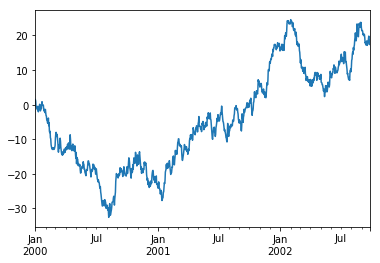

In [93]:
ts.plot()
plt.show()

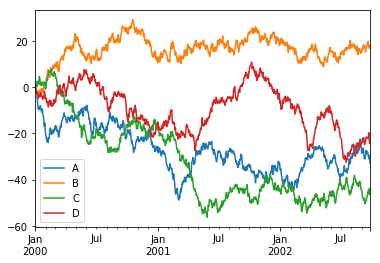

In [94]:
# On DataFrame, plot() is a convenience to plot all of the columns with labels:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot(); 
plt.show()

# Getting Data In/Out
## CSV

In [95]:
# Writing to a csv file

df.to_csv('foo.csv')

In [96]:
# Reading from a csv file

pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.258537,0.469256,2.504558,0.909206
1,2000-01-02,-0.383573,-0.176714,2.550434,-0.337363
2,2000-01-03,-0.845256,-0.424530,1.218071,-1.693095
3,2000-01-04,-2.313167,-0.723127,0.470765,-1.831357
4,2000-01-05,-3.427325,-1.825370,0.868487,-2.753264
5,2000-01-06,-3.907939,-3.174244,0.134303,-3.000864
6,2000-01-07,-5.603227,-3.055619,1.953510,-1.830005
7,2000-01-08,-7.579536,-3.759359,2.598179,-2.186309
8,2000-01-09,-8.519119,-3.999109,2.012625,-2.761499
9,2000-01-10,-9.529736,-4.558449,1.365638,-4.800600


## Excel

In [97]:
# Writing to an excel file

df.to_excel('foo.xlsx', sheet_name='Sheet1')

ModuleNotFoundError: No module named 'openpyxl'

In [98]:
# Reading from an excel file

pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

ModuleNotFoundError: No module named 'xlrd'